<a href="https://colab.research.google.com/github/adityamavle/Robust-word-detector-for-Indic-Documents/blob/main/Robust_word_detector_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports and Setup

In [90]:
!wget -O db_resnet50.pt https://github.com/vatsasree/Robust-word-detector-for-Indic-Documents/raw/main/weights/db_resnet50.pt
!wget -O exp1_classbalanced.pt https://github.com/vatsasree/Robust-word-detector-for-Indic-Documents/raw/main/weights/Class%20balanced%20finetune%20for%20all%20layers_epoch9.pt
!wget -O exp2_random_sampling.pt https://github.com/vatsasree/Robust-word-detector-for-Indic-Documents/raw/main/weights/Random_sampling-finetune%20for%20all%20layers_epoch9.pt
!wget -O exp3_backbone_freezed.pt "https://github.com/vatsasree/Robust-word-detector-for-Indic-Documents/raw/main/weights/Random_sampling-finetune%20for%20last%20layers%20(Backbone%20freezed)_v2_epoch9.pt"
!wget -O test.png https://github.com/vatsasree/Robust-word-detector-for-Indic-Documents/raw/main/test.png
!wget -O requirements.txt https://github.com/vatsasree/Robust-word-detector-for-Indic-Documents/raw/main/requirements.txt

--2023-06-03 10:58:17--  https://github.com/vatsasree/Robust-word-detector-for-Indic-Documents/raw/main/weights/db_resnet50.pt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vatsasree/Robust-word-detector-for-Indic-Documents/main/weights/db_resnet50.pt [following]
--2023-06-03 10:58:17--  https://raw.githubusercontent.com/vatsasree/Robust-word-detector-for-Indic-Documents/main/weights/db_resnet50.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102014573 (97M) [application/octet-stream]
Saving to: ‘db_resnet50.pt’

db_resnet50.pt      100%[===================>]  97.29M   399MB/s    in 0.2s   

In [ ]:
!python --version

Python 3.10.11


In [ ]:
!pip install python-doctr[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 84.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[tf]
# PyTorch
!pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]

DEPRECATION: git+https://github.com/mindee/doctr.git#egg=python-doctr[torch] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining python-doctr[torch] from git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]
  Cloning https://github.com/mindee/doctr.git to ./src/python-doctr
  Running command git clone --filter=blob:none --quiet https://github.com/mindee/doctr.git /content/src/python-doctr
  Resolved https://github.com/mindee/doctr.git to commit d217141fe78c6e100a46836bec4d5c5688985222
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.tom

Restart/Runtime:ctrl+M . after this

In [ ]:
#!pip install python-doctr


In [ ]:
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-10).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
# from doctr.models import detection
%matplotlib inline
import os
import torch
import numpy as np
# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'
import matplotlib.pyplot as plt
from doctr.models import ocr_predictor
from collections import OrderedDict
from doctr.io import DocumentFile
import cv2

### Default model DB Resnet

In [92]:
#Loading the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictor = ocr_predictor(pretrained=True).to(device)

# original saved file with DataParallel
state_dict = torch.load("/content/db_resnet50.pt")

print(type(state_dict.keys()))
#COMMENT THE BELOW LINES OF CODE IF DataParallel was not used during training (provided weights used DataParallel)
# create new OrderedDict that does not contain `module.`

new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module. in variable state dict nomenclature`
    new_state_dict[name] = v
    
predictor.det_predictor.model.load_state_dict(new_state_dict)

<class 'odict_keys'>


<All keys matched successfully>

In [93]:
img = cv2.imread('/content/test.png')
doc = DocumentFile.from_images(["./test.png","./test.png"])
print(len(doc))
print(len(doc[0]))
print('Shape of Image',img.shape) 
print('Dimensions of doc list object',np.array(doc).shape) #1 resembles one image can give multiple images to documentfile from_images
result = predictor(doc)
print(type(result))
# print(result)
dic = result.export()
type(dic)

2
758
Shape of Image (758, 816, 3)
Dimensions of doc list object (2, 758, 816, 3)
<class 'doctr.io.elements.Document'>


dict

In [ ]:
print(dic)

{'pages': [{'page_idx': 0, 'dimensions': (758, 816), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.4541015625, 0.06640625), (0.544921875, 0.087890625)), 'lines': [{'geometry': ((0.4541015625, 0.06640625), (0.544921875, 0.087890625)), 'words': [{'value': 'muJ06mo', 'confidence': 0.40964552760124207, 'geometry': ((0.4541015625, 0.06640625), (0.544921875, 0.087890625))}]}], 'artefacts': []}, {'geometry': ((0.41015625, 0.1240234375), (0.587890625, 0.142578125)), 'lines': [{'geometry': ((0.41015625, 0.1240234375), (0.587890625, 0.142578125)), 'words': [{'value': 'ego', 'confidence': 0.43590328097343445, 'geometry': ((0.41015625, 0.1279296875), (0.4755859375, 0.142578125))}, {'value': 'Dleslaflulo', 'confidence': 0.2550145089626312, 'geometry': ((0.4814453125, 0.1240234375), (0.587890625, 0.138671875))}]}], 'artefacts': []}, {'geometry': ((0.23828125, 0.205078125), (0.3154296875, 0.2236328125)), 'lines': [{'ge

In [94]:
def doctr_predictions(directory):
    """
    Input image directory and get ocr results with output as detection bounding box coordinates and the regions(=words)
    """
    #Gets the predictions from the model
    
    doc = DocumentFile.from_images(directory)
    result = predictor(doc)
    dic = result.export()
    
    page_dims = [page['dimensions'] for page in dic['pages']]
    
    regions = []
    abs_coords = []
    
    regions = [[word for block in page['blocks'] for line in block['lines'] for word in line['words']] for page in dic['pages']]
    print(np.array(regions).shape) # a document is divided into a single region
    abs_coords = [
    [[int(round(word['geometry'][0][0] * dims[1])), #get xmin xmax ymin y max
      int(round(word['geometry'][0][1] * dims[0])), 
      int(round(word['geometry'][1][0] * dims[1])), 
      int(round(word['geometry'][1][1] * dims[0]))] for word in words]
    for words, dims in zip(regions, page_dims)]

#     pred = torch.Tensor(abs_coords[0])
    return abs_coords,regions

In [105]:
#loading the image file and running inference
image_file = "./test.png"
pred,regions = doctr_predictions(image_file)
print(regions[0][1]) #region is a word:its value confidence score and geometry(bounding box coordinates)

(1, 142)
{'value': 'ego', 'confidence': 0.43590399622917175, 'geometry': ((0.41015625, 0.1279296875), (0.4755859375, 0.142578125))}


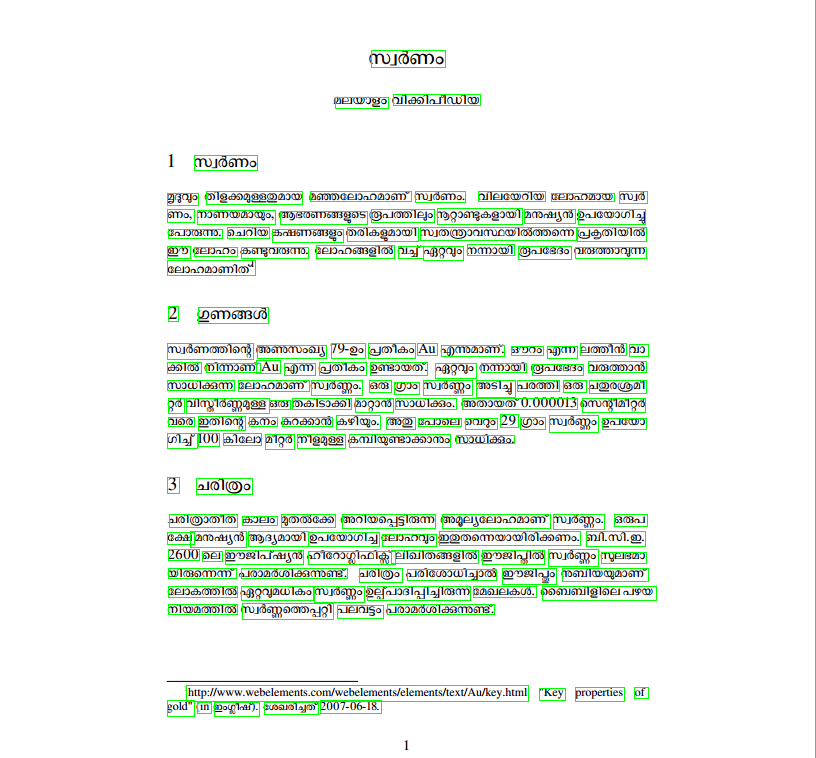

In [96]:
#creating output image
from google.colab.patches import cv2_imshow
image = cv2.imread(image_file)
for w in pred[0]:
    cv2.rectangle(image,(w[0], w[1]),(w[2], w[3]),(0,255,0))
cv2.imwrite(f"output.png", image)
cv2_imshow(image)

### Testing model exp1


In [97]:
#Loading the model
def ocr_model_loader(model_path):
  """
  Load the model trained using dataparallel
  """
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  predictor = ocr_predictor(pretrained=True).to(device)

  # original saved file with DataParallel
  state_dict = torch.load(model_path)

  print(type(state_dict.keys()))
  #COMMENT THE BELOW LINES OF CODE IF DataParallel was not used during training (provided weights used DataParallel)
  # create new OrderedDict that does not contain `module.`

  new_state_dict = OrderedDict()
  for k, v in state_dict.items():
      name = k[7:] # remove `module. in variable state dict nomenclature`
      new_state_dict[name] = v
  predictor.det_predictor.model.load_state_dict(new_state_dict)
ocr_model_loader('/content/exp1_classbalanced.pt')

<class 'odict_keys'>


In [98]:
result2 = predictor(doc)
# print(result)
dic2 = result.export() #convert the detection results to a dict

In [100]:
preds2,regions2 = doctr_predictions(image_file)

(1, 142)


In [101]:
#regions or words detected by db_resnet vs exp1 
print('Default model',np.array(regions).shape)
print('Exp 1 ',np.array(regions2).shape)


Default model (1, 142)
Exp 1  (1, 142)


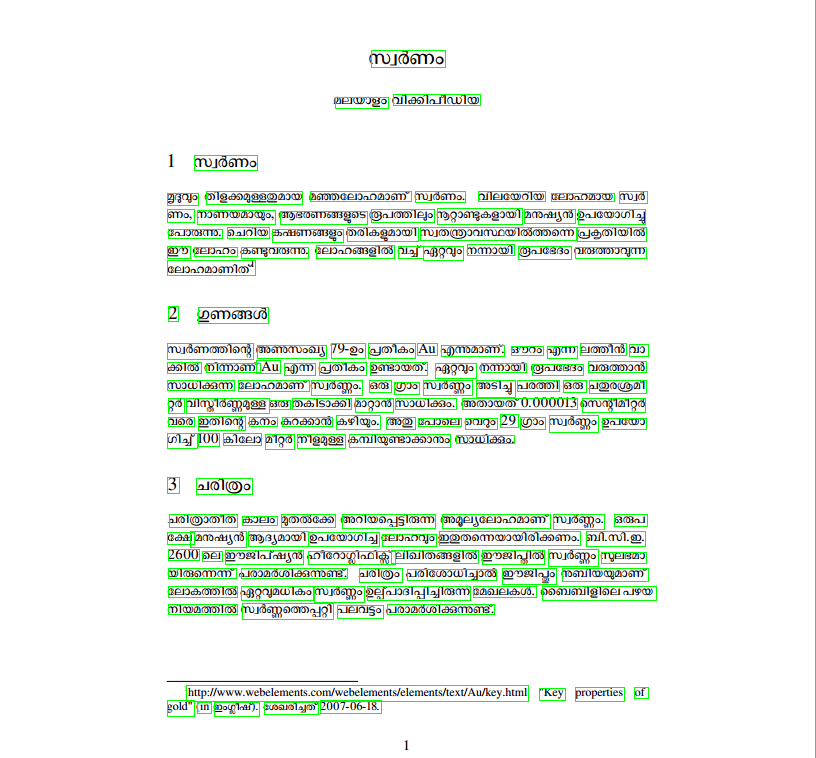

In [102]:
from google.colab.patches import cv2_imshow
img2 = cv2.imread(image_file)
for w in preds2[0]:
    cv2.rectangle(img2,(w[0], w[1]),(w[2], w[3]),(0,255,0))
cv2.imwrite(f"output_exp1.png", img2)
cv2_imshow(img2)

### Testing model exp2

<class 'odict_keys'>
(1, 142)


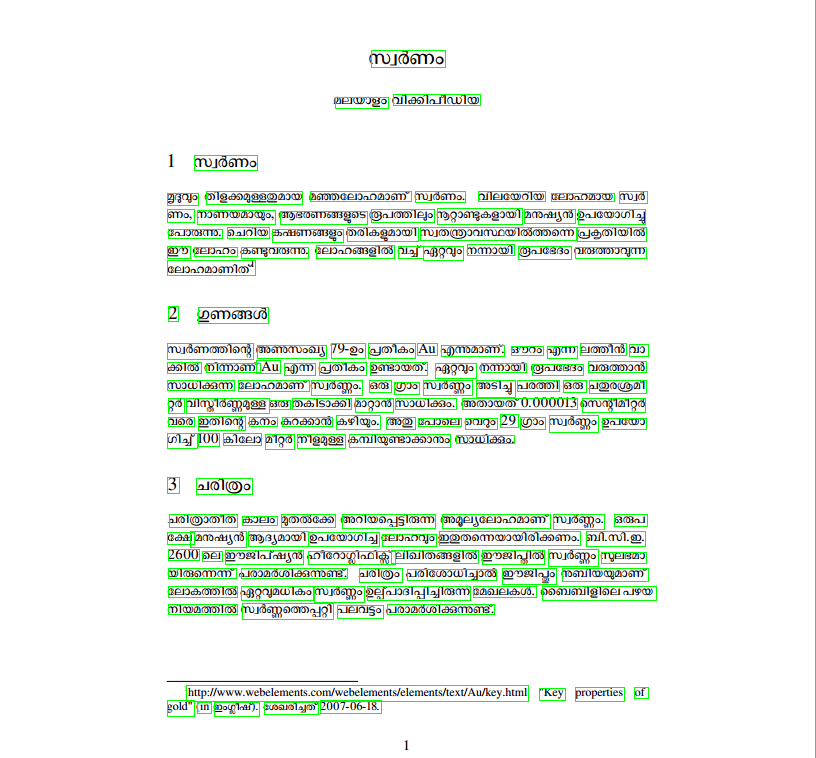

In [103]:
ocr_model_loader('./exp2_random_sampling.pt')
preds3,regions3 = doctr_predictions('./test.png')
img3 = cv2.imread('./test.png')
for w in preds3[0]:
    cv2.rectangle(img3,(w[0], w[1]),(w[2], w[3]),(0,255,0))
cv2.imwrite(f"output.png", img3)
cv2_imshow(image)

### Testing model exp3

<class 'odict_keys'>
(1, 142)


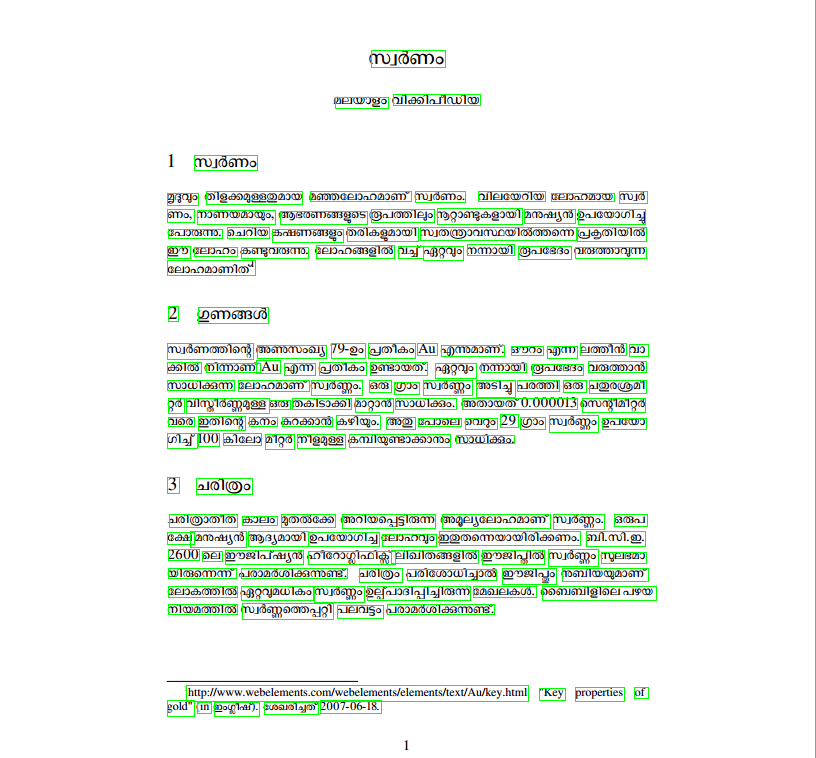

In [104]:
ocr_model_loader('./exp3_backbone_freezed.pt')
preds3,regions3 = doctr_predictions('./test.png')
img3 = cv2.imread('./test.png')
for w in preds3[0]:
    cv2.rectangle(img3,(w[0], w[1]),(w[2], w[3]),(0,255,0))
cv2.imwrite(f"output.png", img3)
cv2_imshow(image)